The Notebook seeks to help predict the rental price of the AirBnB based of several features where the targeted value is the price. The insights provided by your predictive model could benefit both AirBnB hosts and guests. Hosts can use the insights to set competitive prices for their listings, while guests can use the insights to find the best deals on rentals. Additionally, the insights could be used by real estate investors and city planners to gain a better understanding of the housing market and make more informed decisions. 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Importing Data

In [2]:
from pathlib import Path

# Get path to the current notebook file
NOTEBOOK_DIR = Path(__file__).parent if "__file__" in globals() else Path().resolve()

# Point to the data folder relative to the notebook's location
DATA_FOLDER = NOTEBOOK_DIR / "../data"
DATA_FOLDER = DATA_FOLDER.resolve()

# import data
df = pd.read_csv(DATA_FOLDER / 'Airbnb_Data.csv')
df.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# Data Preprocessing

removing the following columns from the dataframe because these columns are not direclty or indeirectly related to the targeted value so removing these columns would not have any effect and on the other hand these coulmns contain textual data in order to make a predictive model all the data should in numerical form

In [3]:
df.columns


Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
df.shape


(74111, 29)

In [5]:
df.describe()


,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
# drop columns that are not needed for analysis
# These columns are not relevant for the analysis and can be dropped
df = df.drop(['id', 'name', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'thumbnail_url', 'zipcode', 'latitude', 'longitude', 'description', 'review_scores_rating', 'number_of_reviews'], axis=1)
df.head()


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,0.0,1.0


In [8]:
# check if there are missing values in the dataset
df.isnull().sum()


log_price                0
property_type            0
room_type                0
amenities                0
accommodates             0
bathrooms              200
bed_type                 0
cancellation_policy      0
cleaning_fee             0
city                     0
instant_bookable         0
bedrooms                91
beds                   131
dtype: int64

In [9]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))


In [10]:
import re

def clean_amenities_str(raw):
    if pd.isna(raw):
        return ''
    
    # Remove curly braces
    raw = raw.strip('{}')

    # Extract quoted or unquoted items
    items = re.findall(r'"([^"]+)"|([^,{}]+)', raw)

    # Flatten and clean each amenity
    amenities = [i[0] if i[0] else i[1] for i in items]
    amenities = [
        a.strip().lower().replace(" ", "_").replace("-", "_")
        for a in amenities
        if a and not a.startswith("translation missing")
    ]

    # Join into a clean single string
    return ', '.join(sorted(set(amenities)))

df['clean_amenities'] = df['amenities'].apply(clean_amenities_str)
df.head()


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,bedrooms,beds,clean_amenities
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,1.0,1.0,"air_conditioning, essentials, family/kid_frien..."
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,3.0,3.0,"air_conditioning, dryer, essentials, family/ki..."
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,1.0,3.0,"air_conditioning, breakfast, buzzer/wireless_i..."
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,2.0,2.0,"buzzer/wireless_intercom, cable_tv, carbon_mon..."
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,0.0,1.0,"air_conditioning, carbon_monoxide_detector, el..."


In [11]:
from collections import Counter

# Step 1: Convert amenities string → list (if not already done)
df['amenities_list'] = df['clean_amenities'].apply(lambda x: x.split(', ') if x else [])

# Step 2: Count all amenities across listings
amenity_counter = Counter()
df['amenities_list'].apply(amenity_counter.update)

# Step 3: Get top 10 amenities
top_10_amenities = set([a for a, _ in amenity_counter.most_common(10)])

# Step 4: Count how many of the top 10 amenities each listing has
df['amenities_count'] = df['amenities_list'].apply(lambda x: sum(a in top_10_amenities for a in x))

df['amenities_list'] = df['amenities_list'].apply(lambda x: ','.join(sorted(x)))

df = df.drop(['amenities', 'clean_amenities', 'amenities_list'], axis=1)


In [12]:
# store all the unique values of all columns in a .txt file
unique_values = {col: df[col].unique() for col in df.columns}
with open(DATA_FOLDER / 'unique_values.txt', 'w') as f:
    for col, values in unique_values.items():
        f.write(f"{col}:\n")
        for value in values:
            f.write(f"  - {value}\n")
        f.write("\n")
        
        

In [79]:
# check if there are still missing values
df.isnull().sum()


log_price              0
property_type          0
room_type              0
accommodates           0
bathrooms              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
city                   0
instant_bookable       0
bedrooms               0
beds                   0
amenities_count        0
dtype: int64

In [80]:
# check for duplicates
df.duplicated().sum()


11658

In [81]:
# drop duplicates
df = df.drop_duplicates()

# check if there are still duplicates
df.duplicated().sum()


0

In [82]:
# total number of rows and columns
df.shape


(62453, 13)

In [ ]:
top_10_amenities


{'air_conditioning',
 'carbon_monoxide_detector',
 'essentials',
 'hangers',
 'heating',
 'kitchen',
 'shampoo',
 'smoke_detector',
 'tv',
 'wireless_internet'}

# Label Encoding for converting textual data into numerical data

converting the following columns into numerical data since predictive model can only have numerical data and the following columns are directly related to the rental price of the AirBnB. Therefore we can not drop these columns 

In [83]:
categorical_col = []
numerical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)


In [84]:
numerical_col


['log_price',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities_count']

In [85]:
categorical_col


['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'instant_bookable']

In [86]:
# encode categorical variables using label encoder
le = LabelEncoder()

for col in categorical_col:
    df[col] = le.fit_transform(df[col])
    
pd.set_option("display.max_columns",None)
df


,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,bedrooms,beds,amenities_count
0,5.010635,0,0,3,1.0,4,2,1,4,0,1.0,1.0,5
1,5.129899,0,0,7,1.0,4,2,1,4,1,3.0,3.0,8
2,4.976734,0,0,5,1.0,4,1,1,4,1,1.0,3.0,10
3,6.620073,17,0,4,1.0,4,0,1,5,0,2.0,2.0,7
4,4.744932,0,0,2,1.0,4,1,1,2,1,0.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,0,0,2,1.0,4,2,1,1,0,1.0,1.0,10
74107,5.043425,0,0,4,2.0,4,1,1,3,0,2.0,4.0,8
74108,5.220356,0,0,5,1.0,4,1,1,4,1,2.0,2.0,10
74109,5.273000,0,0,2,1.0,4,2,1,4,1,0.0,2.0,10


# Spilitting Data into Test and Train set

In [87]:
# split data into 3 sets: train, test and safe 



X = df.drop('log_price', axis=1)
y = df['log_price']


In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying Model of the Data

### 1. Linear Regression

In [89]:
# train model
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [90]:
y_pred_lr = lr.predict(x_test)


In [91]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squared Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squared Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)



Mean Absolute Error of Linear Regression     :  0.3916519799222232

Mean Squared Error of Linear Regression     :  0.2632937059523998

Root Mean Squared Error of Linear Regression:  0.513121531366985

R2 Score of Linear Regression                :  0.5176915406631116


In [92]:
# save the model
import joblib

joblib.dump(lr, DATA_FOLDER / 'linear_regression_model.pkl')


['/Users/tkarim45/Documents/VS Code/Rental Prices of AirBnb/Backend/data/linear_regression_model.pkl']

### 2. Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)


RandomForestRegressor()

In [94]:
y_pred_rf = rfr.predict(x_test)


In [95]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squared Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squared Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)



Mean Absolute Error of Random Forest Regressor     :  0.38419391816109527

Mean Squared Error of Random Forest Regressor     :  0.2573293940211108

Root Mean Squared Error of Random Forest Regressor:  0.5072764473352877

R2 Score of Random Forest Regressor                :  0.5286171269325557


In [96]:
# save the model
import joblib

joblib.dump(rfr, DATA_FOLDER / 'random_forest_regressor_model.pkl')


['/Users/tkarim45/Documents/VS Code/Rental Prices of AirBnb/Backend/data/random_forest_regressor_model.pkl']

# Comparison of the Models

In [97]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf}


In [98]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])


In [99]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org


,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.517692,0.391652,0.263294,0.513122
Random Forest,0.528617,0.384194,0.257329,0.507276


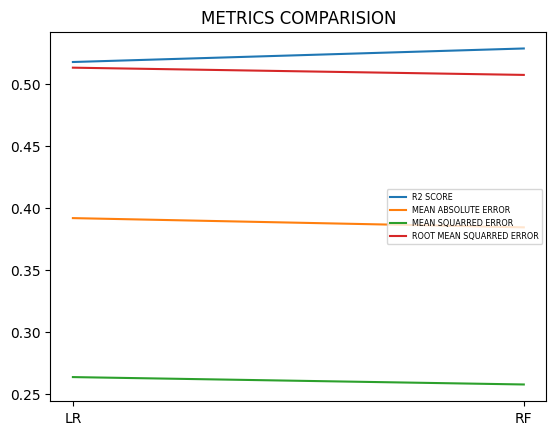

In [100]:
alg = ['LR','RF']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()
